In [18]:
notebook_util.imshow??

In [16]:
import notebook_util
import cv2
from matplotlib import pyplot as plt
import numpy as np
notebook_util.override_imshow(cv2)

%matplotlib inline

Showing Image: Template


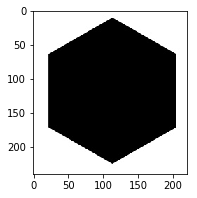

In [2]:
# Load the shape template or reference image
image_data = cv2.imread('./resources/shapes.jpg', cv2.IMREAD_GRAYSCALE)
image_data = image_data[360:600,350:570]
cv2.imshow('Template', image_data)

Showing Image: Search space


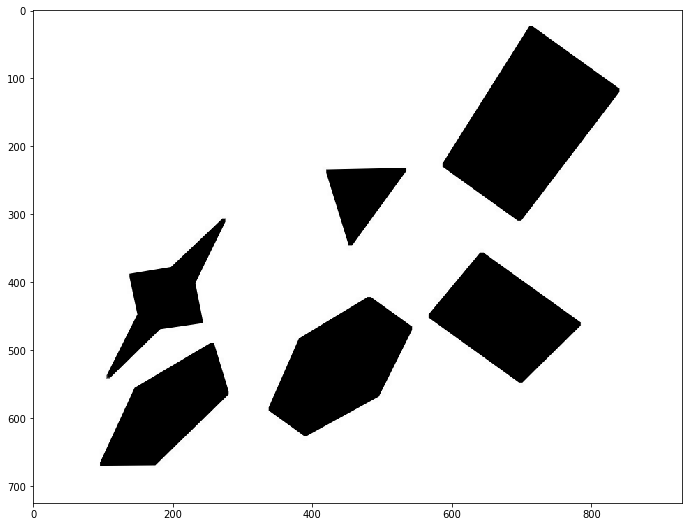

In [5]:
# Load the target image with the shapes we're trying to match
search_canvas = cv2.imread('resources/shapes2.jpg')
kernel = np.ones((5,5), np.uint8)
search_canvas = cv2.erode(search_canvas, kernel, iterations = 1)
cv2.imshow("Search space", search_canvas)

In [6]:
# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(image_data, 127, 255, 0)
gray_search_canvas = cv2.cvtColor(search_canvas, cv2.COLOR_BGR2GRAY)
ret, thresh2 = cv2.threshold(gray_search_canvas, 127, 255, 0)

In [7]:
# Find contours in template
_, contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours found in the template: {}".format(len(contours)))

Number of contours found in the template: 2


In [8]:
# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [9]:
# We extract the second largest contour which will be our template contour
template_contour = contours[1]

In [10]:
# Extract contours from second target image
_, contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:]
print("Number of contours found in the search canvas: {}".format(len(contours)))


Number of contours found in the search canvas: 6


0.0378956217728
0.171425583806
0.0903163292609
0.0531666643905
0.341366532015
0.109445521045
0.0802528065277
Showing Image: Output???


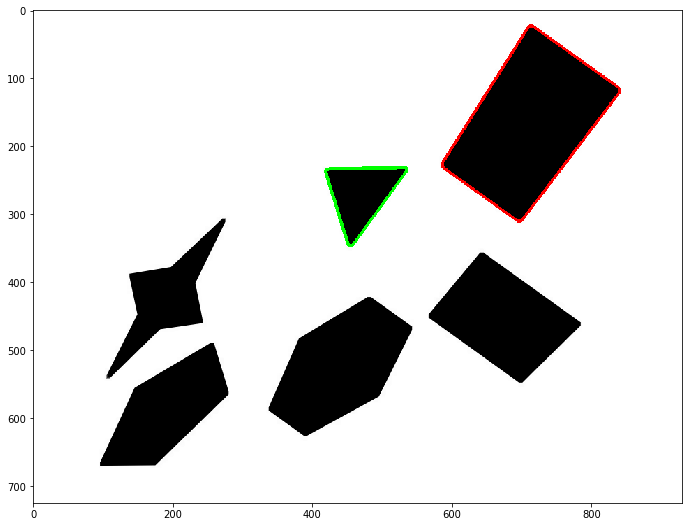

In [14]:
for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    # If the match value is less than 0.15 we

    if match < 0.5:
        closest_contour = c
        print(match)
                
cv2.drawContours(search_canvas, [closest_contour], -1, (0,0,255), 3)
cv2.imshow('Output???', search_canvas)

In [15]:
#?????????????????#